In [1]:
include("simple_sn.jl")
using Main.SNetwork

In [2]:
import Statistics.mean

In [3]:
using PyPlot

In [4]:
nhidden = 20

20

In [5]:
xor_x = [0.2 0.2; 0.2 1.0; 1.0 0.2; 1.0 1.0]

4×2 Array{Float64,2}:
 0.2  0.2
 0.2  1.0
 1.0  0.2
 1.0  1.0

In [6]:
xor_y = [1.0 0.0; 0.0 1.0; 0.0 1.0; 1.0 0.0]

4×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0
 0.0  1.0
 1.0  0.0

In [7]:
or_y = [1.0 0.0; 0.0 1.0; 0.0 1.0; 0.0 1.0]

4×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0
 0.0  1.0
 0.0  1.0

In [8]:
n1 = Network([2, nhidden, 2], 0.0, 1.0, 4)

Network(Dict(4 => [0; 0],2 => [0; 0; … ; 0; 0],3 => [0; 0],1 => [0; 0]), Dict(2 => [0 0 0 0; 0 0 0 0; … ; 0 0 0 0; 0 0 0 0],3 => [0 0 0 0; 0 0 0 0],1 => [0 0 0 0; 0 0 0 0]), Dict{Int64,Array{#s1,2} where #s1<:Real}(2 => [0.0; 0.0; … ; 0.0; 0.0],3 => [0.0; 0.0],1 => [-1.0; -1.0]), Dict{Tuple{Int64,Int64},Array{#s2,2} where #s2<:Real}((1, 2) => [-1.0861199615839634 -2.4580778878666383 … -0.2976497114463969 -0.9752124704235561; 0.14218293673140023 1.0443870693448416 … -1.427176854773828 -0.1632190142111094],(2, 3) => [0.04909716284895678 -0.5626426083313836; -0.7386625407381896 0.1301581967887306; … ; -0.43410141080207076 -1.9375484841812316; -0.4348169518411869 1.7366190653799534]), [2, 20, 2], [0.0, 0.0], [0.0, 0.0], 3, [1.0, 1.0, 1.0], 0.0, false, 4, 0, 1000, 250, 0.0005, 0)

In [9]:
n1.thresholds[2] = 0.9
n1.thresholds[3] = 0.025 * nhidden

0.5

In [10]:
n1.soft_reset = true

true

In [11]:
n1.learn_rate

0.0005

In [12]:
l = train_loop(n1, xor_x, xor_y, 50, 150)

150-element Array{Float64,1}:
 2.412241563781952     
 0.78988049338711      
 4.209815603231322     
 1.5383486685824903    
 1.6697494740788095    
 2.768646286440037     
 0.40336624558547957   
 0.7572526998891325    
 0.7870693296053142    
 0.34370088980882646   
 1.3714647533624007    
 0.24322327570872923   
 1.0785353468975503    
 ⋮                     
 8.26420741118365e-5   
 0.0005473542771208606 
 0.0001124254098080712 
 0.0009826046614616736 
 0.0001069365391400538 
 0.000112840825691802  
 6.068239961816997e-5  
 0.000289492797465594  
 0.0003581663696975457 
 0.00010931848461095892
 7.33148658646497e-5   
 0.00107514526840259   

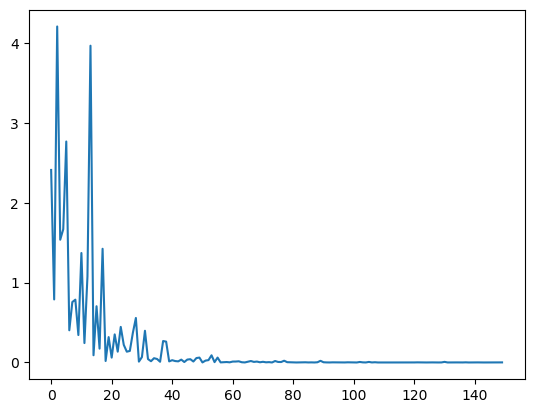

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7a73085400>

In [13]:
plot(l)

In [14]:
fr = test(n1, xor_x, 2000)

4×2 Array{Float64,2}:
 0.088  0.012 
 0.027  0.3085
 0.006  0.334 
 0.393  0.025 

In [15]:
fr .* 500

4×2 Array{Float64,2}:
  44.0    6.0 
  13.5  154.25
   3.0  167.0 
 196.5   12.5 

In [16]:
accuracy(fr, xor_y)

1.0

In [17]:
sampl = [accuracy(test(n1, xor_x, 2000), xor_y) for i in 1:100]

100-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [18]:
mean(sampl)

1.0